📝Predicting diabetes
This data set originally comes from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict, based on diagnostic measures, whether or not a patient has diabetes.

🧐 Hypothesys - What are we looking for?

We want to check if there is a significant relationship between the variables Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age and the class variable Outcome in the data set. It is hypothesized that certain values ​​or combinations of values ​​in these variables may be associated with an increased risk of suffering from diabetes, and that, therefore, these variables could be used to develop a predictive model for the probability of diabetes in...hypotheses, will be carried out Statistical analyses, such as regressions and significance tests, to evaluate the strength and direction of associations between the independent variables (Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age) and the dependent variable (Outcome). If the significant relationship is confirmed, a predictive model could be developed that uses these variables to estimate the probability of suffering from diabetes in a population.

📚Import libraries

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pickle import dump, load
from sklearn.feature_selection import chi2 , SelectKBest, mutual_info_regression
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error, r2_score, make_scorer, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import metrics

Data Ingestion

In [62]:
link = 'https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv'
total_data = pd.read_csv(link)
total_data.to_csv('diabetes.csv', index=False)


Data variables dictionary:

✅Pregnancies. Número de embarazos del paciente (numérico)

✅Glucose. Concentración de glucosa en plasma a las 2 horas de un test de tolerancia oral a la glucosa (numérico)

✅BloodPressure. Presión arterial diastólica (medida en mm Hg) (numérico)

✅SkinThickness. Grosor del pliegue cutáneo del tríceps (medida en mm) (numérico)

✅Insulin. Insulina sérica de 2 horas (medida en mu U/ml) (numérico)

✅BMI. Índice de masa corporal (numérico)

✅DiabetesPedigreeFunction. Función de pedigrí de diabetes (numérico)

✅Age. Edad del paciente (numérico)

💥Outcome. Variable de clase (0 o 1), siendo 0 negativo en diabetes y 1, positivo (numérico)

Data exploration and descriptive analysis

In [63]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


There are 8 variables in the dataset and they are all numerical, the dependent variable is outcome which returns the values ​​0 and 1 that we will interpret in a Boolean way.

In [64]:
total_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Verificar valores con valores 0

In [65]:
import pandas as pd

zero_count_by_variable = (total_data == 0).sum()

# Imprime el resultado
print("Variables con valores iguales a 0 y cantidad de 0 por variable:")
print(zero_count_by_variable)


Variables con valores iguales a 0 y cantidad de 0 por variable:
Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


Los valores de Glucose, Blood Pressure, Insulin, BMI y SkinThickness son anormalmente bajos, lo que sugiere que se trata de un error en los datos, por tanto se procede a imputar estos datos contra la mediana

In [66]:
columns_to_impute = ['Glucose', 'BloodPressure', 'Insulin', 'BMI', 'SkinThickness']
total_data[columns_to_impute] = total_data[columns_to_impute].apply(lambda x: x.replace(0, x.median()), axis=0)
# Imprime el DataFrame después de la imputación
print(total_data)


     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35     30.5  33.6   
1              1       85             66             29     30.5  26.6   
2              8      183             64             23     30.5  23.3   
3              1       89             66             23     94.0  28.1   
4              0      137             40             35    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48    180.0  32.9   
764            2      122             70             27     30.5  36.8   
765            5      121             72             23    112.0  26.2   
766            1      126             60             23     30.5  30.1   
767            1       93             70             31     30.5  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [67]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 54.1 KB


Check duplicates

In [68]:
print(total_data.duplicated().sum())

0


No duplicates found there

In [7]:
'''#Reset index
total_data.reset_index(drop=True, inplace=True)'''

🚀 Descriptive data analysis

In [69]:
total_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


✅Pregnancies:

Número de valores: 768
Media: 3.85
Desviación estándar: 3.37
Percentiles: 25%: 1, 50%: 3, 75%: 6
Valor mínimo: 0
Valor máximo: 17

✅Glucose:

Número de valores: 768
Media: 121.66
Desviación estándar: 30.44
Percentiles: 25%: 99.75, 50%: 117, 75%: 140.25
Valor mínimo: 44
Valor máximo: 199

✅BloodPressure:

Número de valores: 768
Media: 72.39
Desviación estándar: 12.10
Percentiles: 25%: 64, 50%: 72, 75%: 80
Valor mínimo: 24
Valor máximo: 122

✅SkinThickness:

Número de valores: 768
Media: 27.33
Desviación estándar: 9.23
Percentiles: 25%: 23, 50%: 23, 75%: 32
Valor mínimo: 7
Valor máximo: 99

✅Insulin:

Número de valores: 768
Media: 94.65
Desviación estándar: 105.55
Percentiles: 25%: 30.5, 50%: 31.25, 75%: 127.25
Valor mínimo: 14
Valor máximo: 846

✅BMI:

Número de valores: 768
Media: 32.45
Desviación estándar: 6.88
Percentiles: 25%: 27.5, 50%: 32, 75%: 36.6
Valor mínimo: 18.2
Valor máximo: 67.1

✅DiabetesPedigreeFunction:

Número de valores: 768
Media: 0.47
Desviación estándar: 0.33
Percentiles: 25%: 0.24, 50%: 0.37, 75%: 0.63
Valor mínimo: 0.078
Valor máximo: 2.42

✅Age:

Número de valores: 768
Media: 33.24
Desviación estándar: 11.76
Percentiles: 25%: 24, 50%: 29, 75%: 41
Valor mínimo: 21
Valor máximo: 81

✅Outcome:

Número de valores: 768
Media: 0.35
Desviación estándar: 0.48
Percentiles: 25%: 0, 50%: 0, 75%: 1
Valor mínimo: 0
Valor máximo: 1

🚀 EDA

EXPLORING VARIABLES

In [70]:
#Verify null values
total_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There is no null values

👉 Univariate analysis

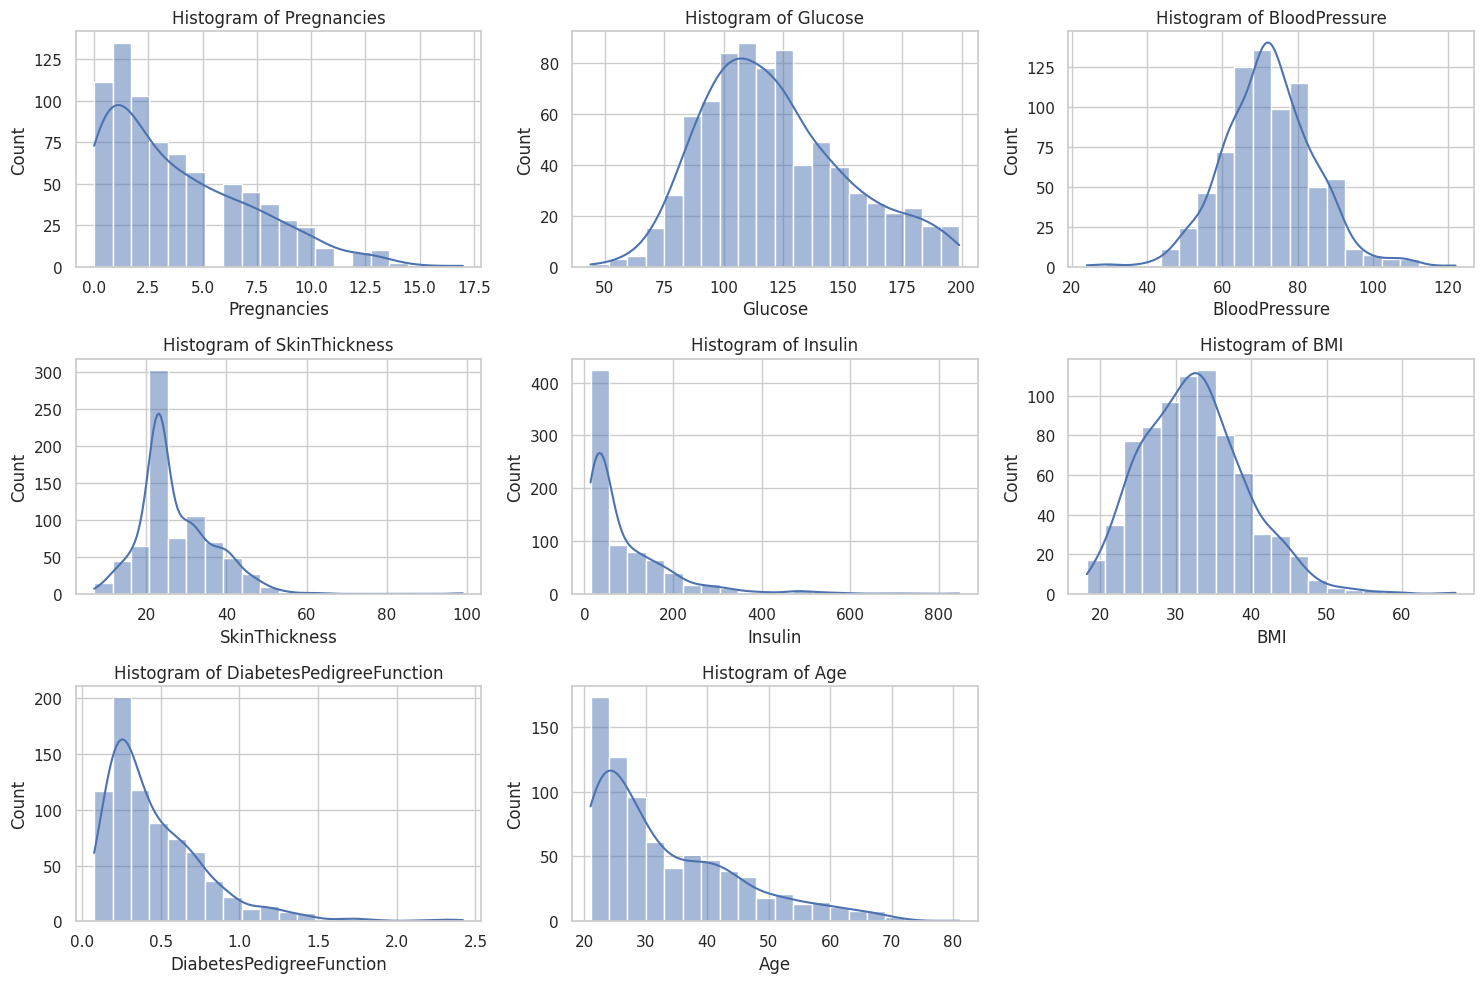

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Numeric variables
numeric_variables = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]

# Create histograms for each
plt.figure(figsize=(15, 10))
for i, variable in enumerate(numeric_variables, 1):
    plt.subplot(3, 3, i)
    sns.histplot(total_data[variable], bins=20, kde=True)
    plt.title(f'Histogram of {variable}')

plt.tight_layout()
plt.show()


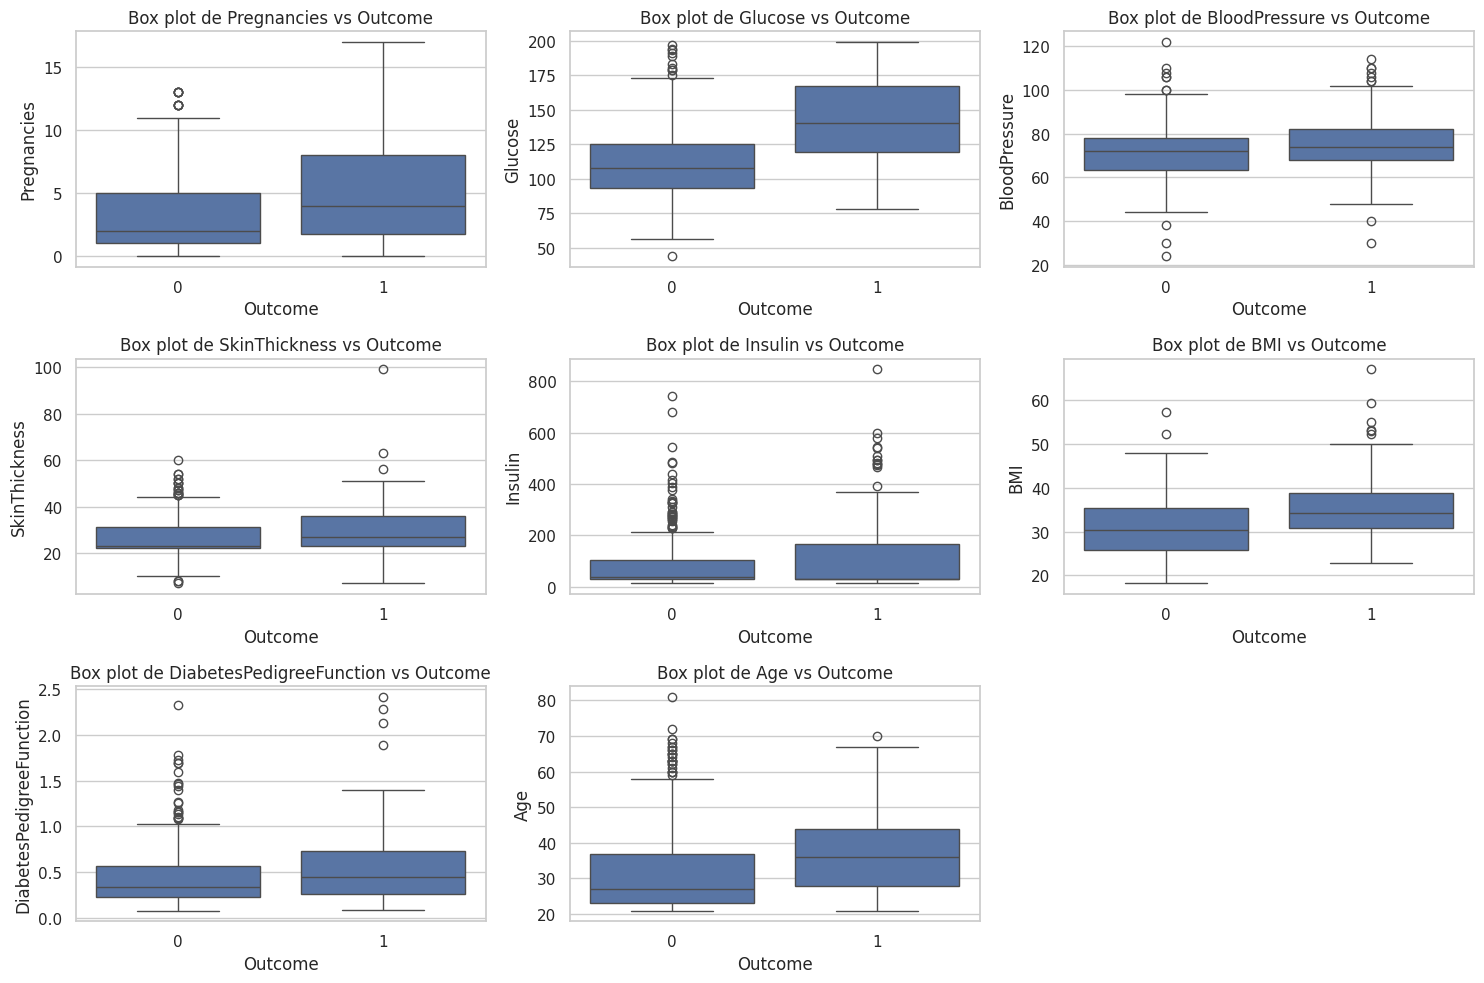

In [72]:
# box plots
plt.figure(figsize=(15, 10))
for i, variable in enumerate(numeric_variables, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x="Outcome", y=variable, data=total_data)
    plt.title(f'Box plot de {variable} vs Outcome')
plt.tight_layout()
plt.show()

👉 Multivariate analysis

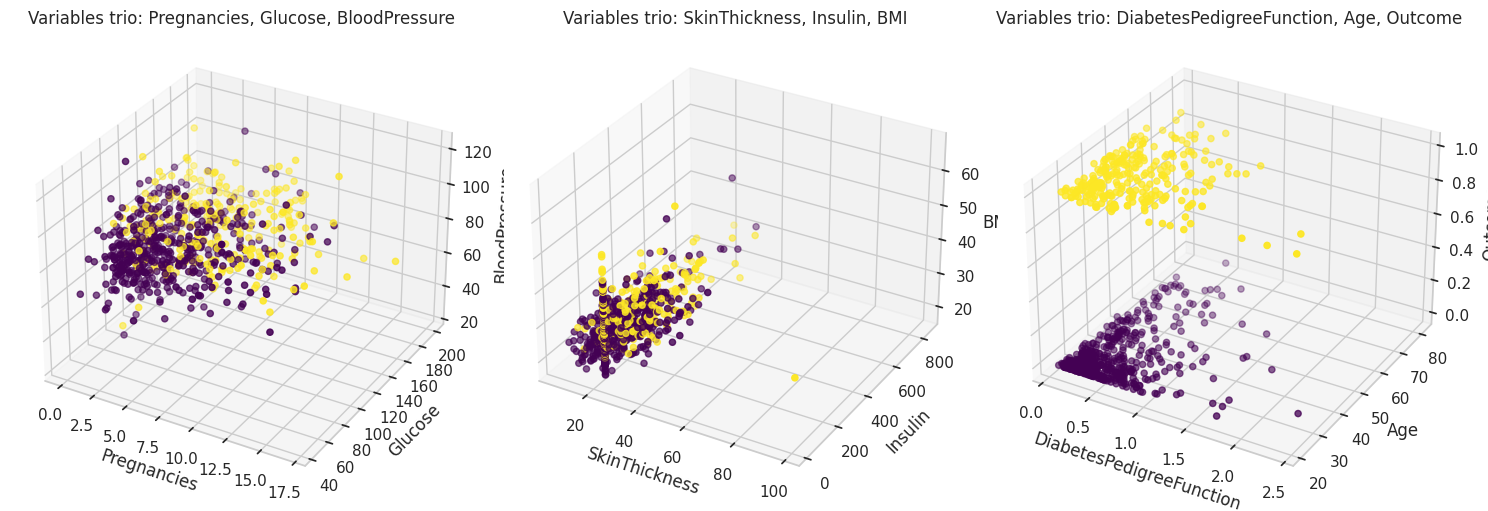

In [73]:
# Create 3D graphs using matplotlib
from mpl_toolkits.mplot3d import Axes3D

# Select trios variables
trios_variables = [
    ["Pregnancies", "Glucose", "BloodPressure"],
    ["SkinThickness", "Insulin", "BMI"],
    ["DiabetesPedigreeFunction", "Age", "Outcome"]
]

# Creating 3D graphs
fig = plt.figure(figsize=(15, 5))

for i, trio in enumerate(trios_variables, start=1):
    ax = fig.add_subplot(1, 3, i, projection='3d')
    ax.scatter(total_data[trio[0]], total_data[trio[1]], total_data[trio[2]], c=total_data["Outcome"], cmap='viridis')
    ax.set_xlabel(trio[0])
    ax.set_ylabel(trio[1])
    ax.set_zlabel(trio[2])
    ax.set_title(f'Variables trio: {trio[0]}, {trio[1]}, {trio[2]}')

plt.tight_layout()
plt.show()

👉 Comparing by trios 🧛‍♂️🧚‍♀️🧙‍♂️

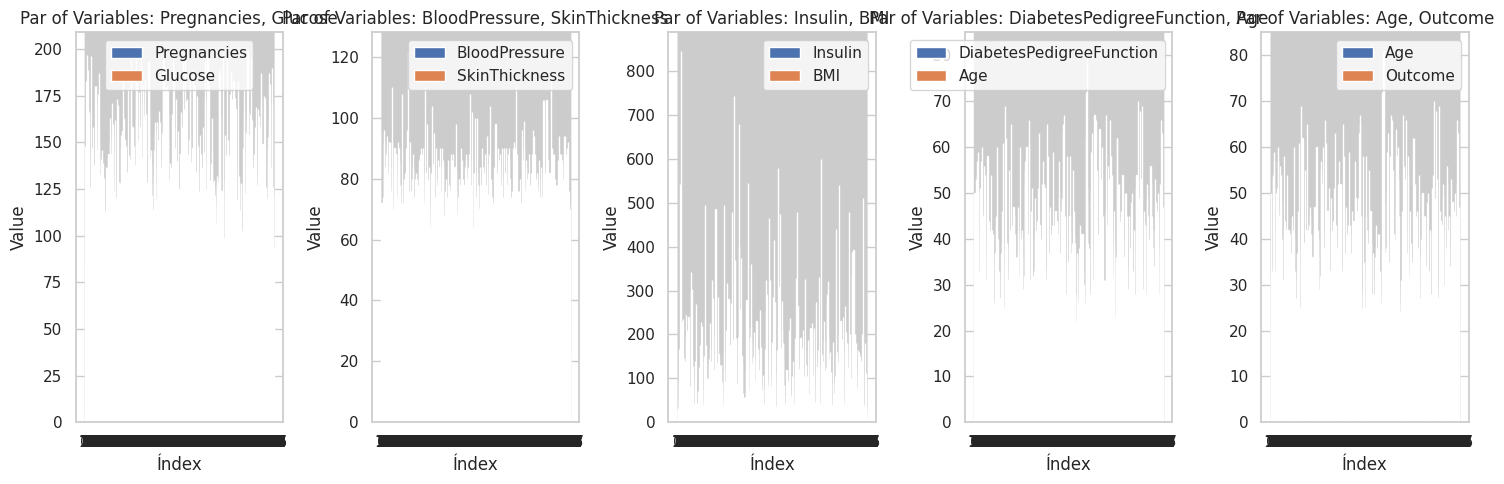

In [74]:
import matplotlib.pyplot as plt
import numpy as np

# Selecting by par
pares_variables = [
    ["Pregnancies", "Glucose"],
    ["BloodPressure", "SkinThickness"],
    ["Insulin", "BMI"],
    ["DiabetesPedigreeFunction", "Age"],
    ["Age", "Outcome"]
]

# Create Clustered Bar Subcharts
fig, axes = plt.subplots(nrows=1, ncols=len(pares_variables), figsize=(15, 5))

for i, par in enumerate(pares_variables):
    # Config bars and labels
    positions = np.arange(len(total_data))

    # Config width of bars
    width = 0.4

    # Create agruping bars
    for j, variable in enumerate(par):
        axes[i].bar(positions + j * width, total_data[variable], width, label=variable)

    # Config labels and legends
    axes[i].set_xticks(positions + width / 2)
    axes[i].set_xticklabels(total_data.index)
    axes[i].set_xlabel('Índex')
    axes[i].set_ylabel('Value')
    axes[i].set_title(f'Par of Variables: {", ".join(par)}')
    axes[i].legend()

plt.tight_layout()
plt.show()

👉 Comparing by trios 👩‍⚕️👨‍⚕️

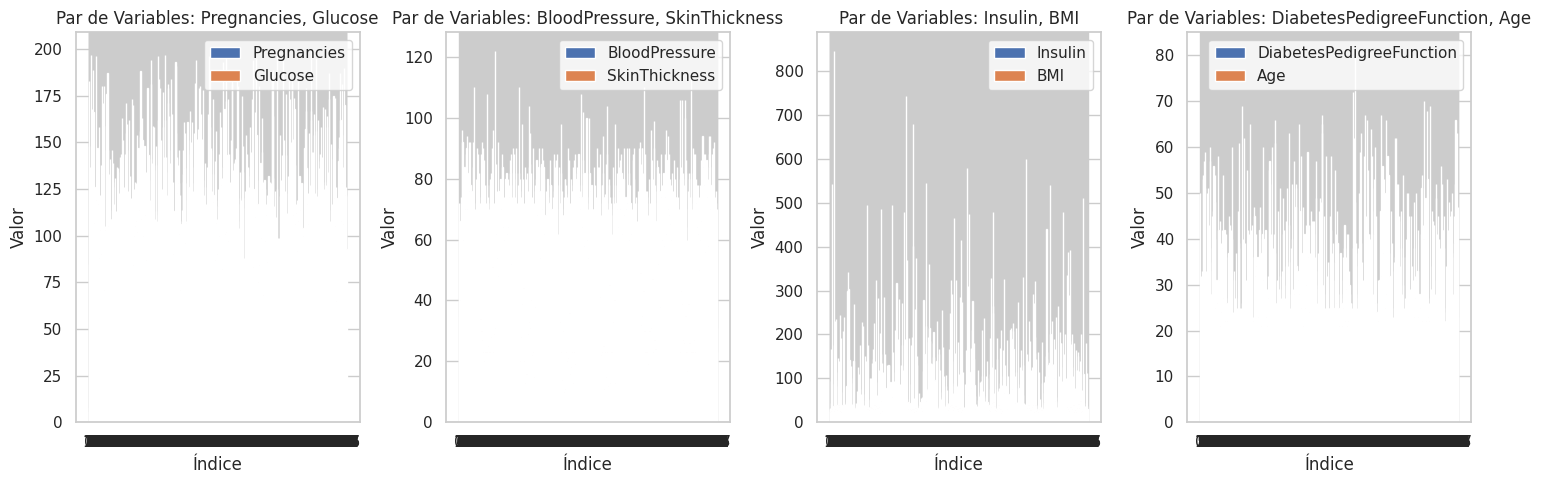

In [75]:
import matplotlib.pyplot as plt
import numpy as np

# Selection par of variables to plot
pares_variables = [
    ["Pregnancies", "Glucose"],
    ["BloodPressure", "SkinThickness"],
    ["Insulin", "BMI"],
    ["DiabetesPedigreeFunction", "Age"]
]

# Create Clustered Bar Subcharts
fig, axes = plt.subplots(nrows=1, ncols=len(pares_variables), figsize=(15, 5))

for i, par in enumerate(pares_variables):
    # Configure bar positions
    positions = np.arange(len(total_data))

    # Set the width of the bars
    width = 0.4

    # Create the bar chart
    for j, variable in enumerate(par):
        axes[i].bar(positions + j * width, total_data[variable], width, label=variable)

    # Config labels and legends
    axes[i].set_xticks(positions + width / 2)
    axes[i].set_xticklabels(total_data.index)
    axes[i].set_xlabel('Índice')
    axes[i].set_ylabel('Valor')
    axes[i].set_title(f'Par de Variables: {", ".join(par)}')
    axes[i].legend()

plt.tight_layout()
plt.show()


Once the EDA is completed, we calculate the correlation matrix of the variables with respect to Outcome

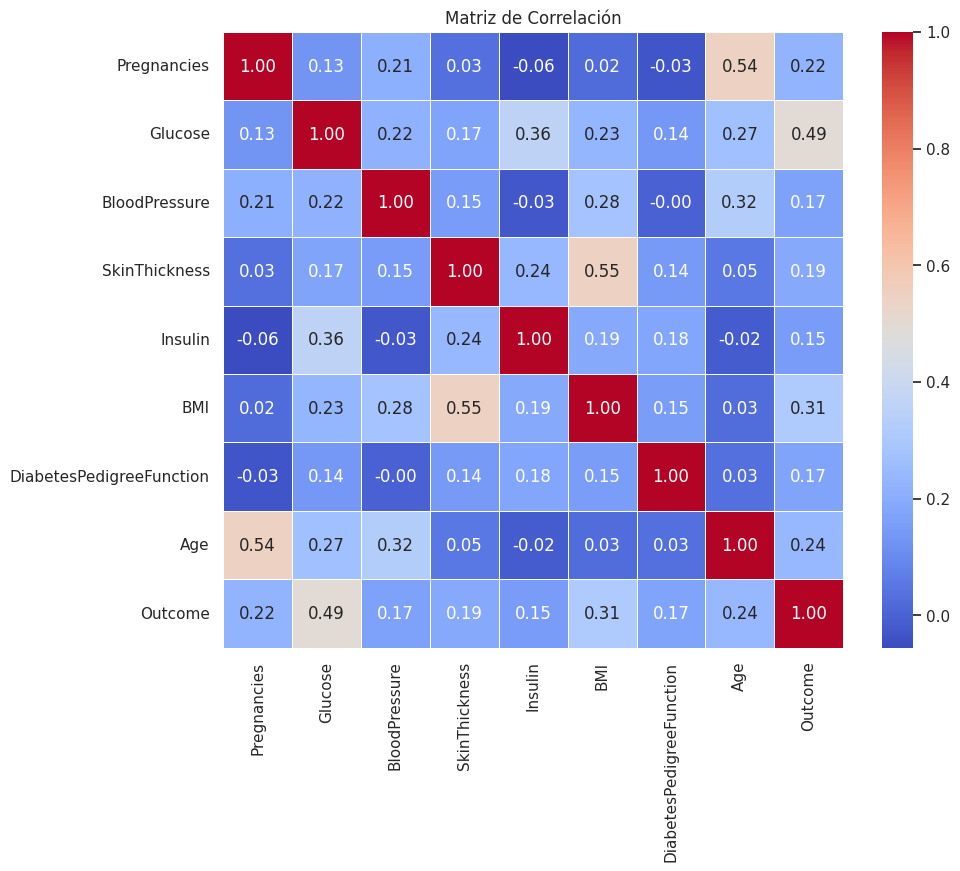

In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create correlation matrix
correlation_matrix = total_data.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()

👩‍💻Variables con correlacion significativa respecto a outcome

👍Las mayores correlaciones entre Outcome y las variables independietes observadas son: 

👉Glucosa: 49 % 
👉BMI: 31% 
👉AGE: 24 % 
👉Pregnancies: 22 % 


Cálculo numérico de la matriz de correlacion

In [77]:
import pandas as pd

# Create matrix
correlation_matrix = total_data.corr()

# Print the matrix
print("Matriz de Correlación:\n", correlation_matrix)

Matriz de Correlación:
                           Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.128213       0.208615       0.032568   
Glucose                      0.128213  1.000000       0.218937       0.172143   
BloodPressure                0.208615  0.218937       1.000000       0.147809   
SkinThickness                0.032568  0.172143       0.147809       1.000000   
Insulin                     -0.055697  0.357573      -0.028721       0.238188   
BMI                          0.021546  0.231400       0.281132       0.546951   
DiabetesPedigreeFunction    -0.033523  0.137327      -0.002378       0.142977   
Age                          0.544341  0.266909       0.324915       0.054514   
Outcome                      0.221898  0.492782       0.165723       0.189065   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.055697  0.021546                 -0.033523   
Glucose          

👩‍🏫 Pair plot (All respect tooutcome)

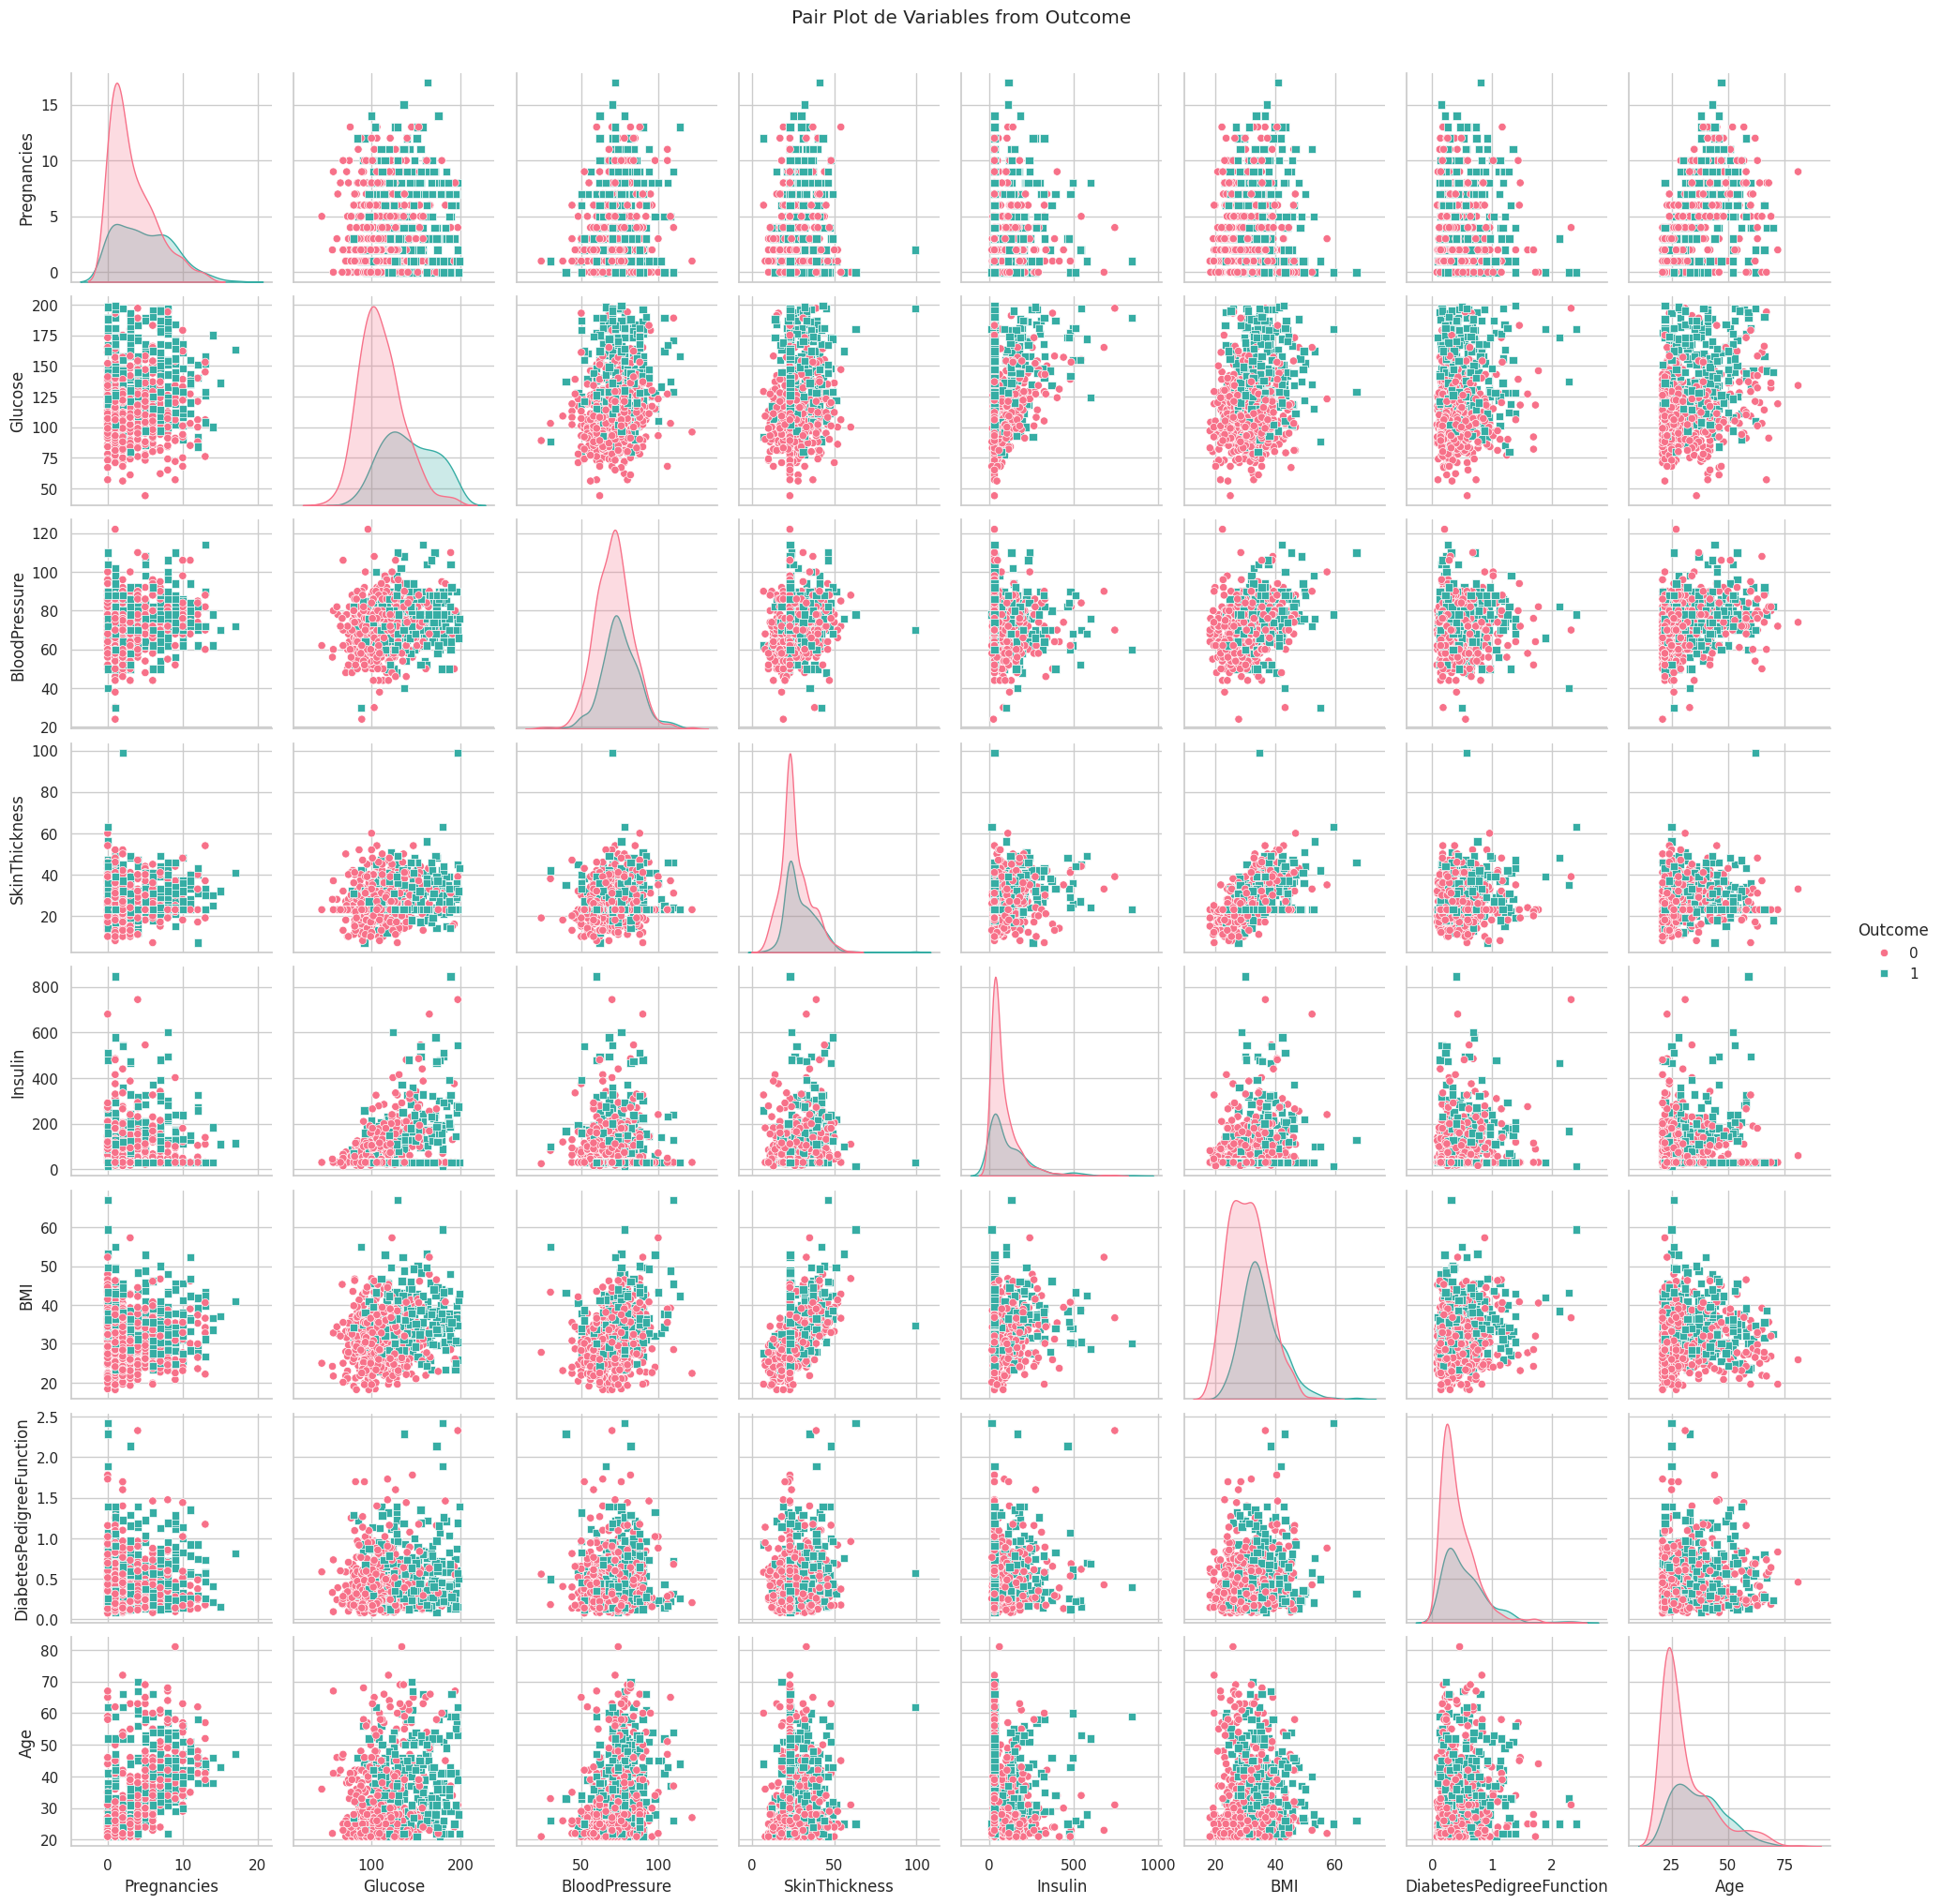

In [78]:
# Select all variables
variables_interes = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]

# Create a subset of the data
subset_data = total_data[variables_interes]

# Creete pair plot
sns.pairplot(subset_data, hue="Outcome", markers=["o", "s"], palette="husl")
plt.suptitle("Pair Plot de Variables from Outcome", y=1.02)
plt.show()


Dealing with 0 values

In [22]:
# Count the number of rows with at least a value 0
num_filas_con_0 = (total_data == 0).any(axis=1).sum()

# Print the number of rows with 0 values
print(f"Number of rows including 0 values: {num_filas_con_0}")
# Filtrar las filas con al menos un valor igual a 0
filas_con_0 = total_data[(total_data == 0).any(axis=1)]

# Show resulting rows
print("Filas con al menos un valor igual a 0:")
print(filas_con_0)


Number of rows including 0 values: 538
Filas con al menos un valor igual a 0:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
1              1       85             66             29     30.5  26.6   
3              1       89             66             23     94.0  28.1   
4              0      137             40             35    168.0  43.1   
5              5      116             74             23     30.5  25.6   
7             10      115             72             23     30.5  35.3   
..           ...      ...            ...            ...      ...   ...   
762            9       89             62             23     30.5  22.5   
763           10      101             76             48    180.0  32.9   
764            2      122             70             27     30.5  36.8   
765            5      121             72             23    112.0  26.2   
767            1       93             70             31     30.5  30.4   

     DiabetesPedigreeFunction  Ag

We decided to keep values ​​at 0, in this case, if we eliminate the 0 values ​​of the outcome that is committed as a boolean, the model will not predict correctly.

✨ Data Cleaning - Feature engineering

In [24]:

out_of_limit_values = {}  # Inicializar el diccionario fuera del bucle

# Calculate upper and lower limits for outlier detection for each variable
for variable in total_data.columns:
    variable_stats = total_data[variable].describe()

    iqr = variable_stats["75%"] - variable_stats["25%"]
    upper_limit = variable_stats["75%"] + 1.5 * iqr
    lower_limit = variable_stats["25%"] - 1.5 * iqr

    # Identify values outside the limits
    upper_values = total_data[total_data[variable] > upper_limit]
    lower_values = total_data[total_data[variable] < lower_limit]

    # Store count in the dictionary
    out_of_limit_values[variable] = {
        'upper': len(upper_values),
        'lower': len(lower_values)
    }

    # Print the results
    print(f"\nUpper and lower limits for outlier detection of {variable}:")
    print(f"Upper: {round(upper_limit, 2)}, Lower: {round(lower_limit, 2)}, Interquartile Range: {round(iqr, 2)}")
    print(f"Number of values above the upper limit: {len(upper_values)}")
    print(f"Number of values below the lower limit: {len(lower_values)}")



Upper and lower limits for outlier detection of Pregnancies:
Upper: 13.5, Lower: -6.5, Interquartile Range: 5.0
Number of values above the upper limit: 4
Number of values below the lower limit: 0

Upper and lower limits for outlier detection of Glucose:
Upper: 201.0, Lower: 39.0, Interquartile Range: 40.5
Number of values above the upper limit: 0
Number of values below the lower limit: 0

Upper and lower limits for outlier detection of BloodPressure:
Upper: 104.0, Lower: 40.0, Interquartile Range: 16.0
Number of values above the upper limit: 10
Number of values below the lower limit: 4

Upper and lower limits for outlier detection of SkinThickness:
Upper: 45.5, Lower: 9.5, Interquartile Range: 9.0
Number of values above the upper limit: 31
Number of values below the lower limit: 4

Upper and lower limits for outlier detection of Insulin:
Upper: 272.38, Lower: -114.62, Interquartile Range: 96.75
Number of values above the upper limit: 49
Number of values below the lower limit: 0

Upper

In [25]:
total_data = total_data.drop_duplicates().reset_index(drop = True)
total_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


👨‍💻Feature Selection

In [94]:
# Feature selection

from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split

X = total_data.drop("Outcome", axis = 1)
y = total_data["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 42)

selection_model = SelectKBest(k = 7)
selection_model.fit(X_train, y_train)

selected_columns = X_train.columns[selection_model.get_support()]
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = selected_columns)
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = selected_columns)

X_train_sel.head()

,Pregnancies,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.0,141.0,26.0,30.5,32.4,0.433,22.0
1,2.0,115.0,22.0,30.5,30.8,0.421,21.0
2,5.0,130.0,23.0,30.5,39.1,0.956,37.0
3,3.0,150.0,23.0,30.5,21.0,0.207,37.0
4,3.0,82.0,23.0,30.5,21.1,0.389,25.0


In [95]:
# Antes de la selección de características
print("Proporción de clases en y_train antes de la selección de características:")
print(y_train.value_counts(normalize=True))

# Después de la selección de características
print("\nProporción de clases en y_train después de la selección de características:")
print(y_train.value_counts(normalize=True))



Proporción de clases en y_train antes de la selección de características:
Outcome
0    0.640625
1    0.359375
Name: proportion, dtype: float64

Proporción de clases en y_train después de la selección de características:
Outcome
0    0.640625
1    0.359375
Name: proportion, dtype: float64


In [60]:
'''from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

# Supongamos que ya tienes X_train, X_test, y_train, y_test definidos

# Feature selection
selection_model = SelectKBest(k=7)
X_train_selected = pd.DataFrame(selection_model.fit_transform(X_train, y_train), columns=selected_columns)
X_test_selected = pd.DataFrame(selection_model.transform(X_test), columns=selected_columns)

# Aplicar RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_selected, y_train)

# Verificar las proporciones después del remuestreo
print("\nProporción de clases en y_train después del remuestreo:")
print(pd.Series(y_train_resampled).value_counts(normalize=True))'''



Proporción de clases en y_train después del remuestreo:
Outcome
0    0.5
1    0.5
Name: proportion, dtype: float64


In [96]:
X_test_sel.head()

,Pregnancies,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,98.0,33.0,190.0,34.0,0.430,43.0
1,2.0,112.0,32.0,30.5,35.7,0.148,21.0
2,2.0,108.0,23.0,30.5,30.8,0.158,21.0
3,8.0,107.0,23.0,30.5,24.6,0.856,34.0
4,7.0,136.0,23.0,30.5,29.9,0.210,50.0


✨Guardar conjunto de datos 

In [97]:
X_train_sel["Outcome"] = y_train.values
X_test_sel["Outcome"] = y_test.values
X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)

🌼Decision Tree

In [98]:
train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")
train_data.head()

,Pregnancies,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.0,141.0,26.0,30.5,32.4,0.433,22.0,0
1,2.0,115.0,22.0,30.5,30.8,0.421,21.0,0
2,5.0,130.0,23.0,30.5,39.1,0.956,37.0,1
3,3.0,150.0,23.0,30.5,21.0,0.207,37.0,0
4,3.0,82.0,23.0,30.5,21.1,0.389,25.0,0


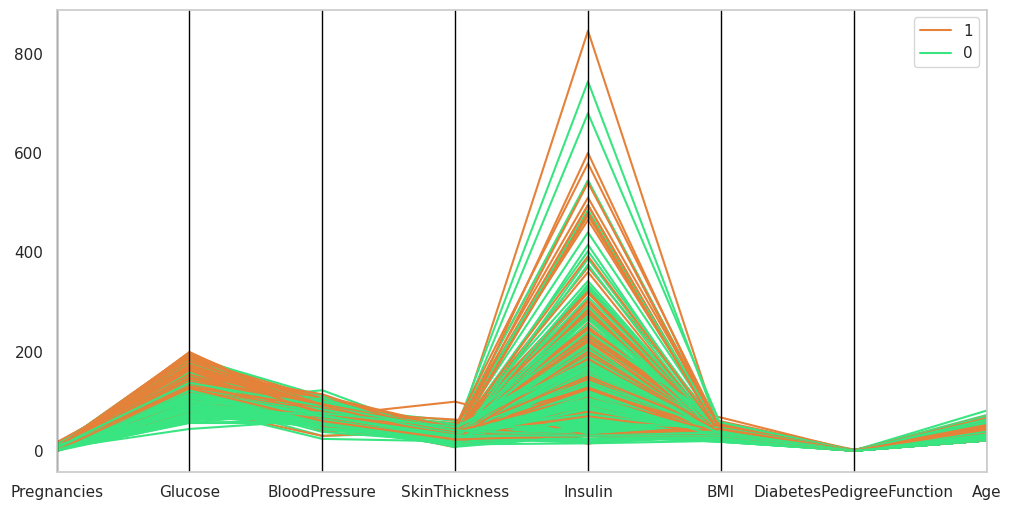

In [99]:
#Graphics
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

pd.plotting.parallel_coordinates(total_data, "Outcome", color = ("#E58139", "#39E581", "#8139E5"))

plt.show()

Moving forward, we perform splitting on two data sets (train_data and test_data) into feature sets and labels for training and testing, respectively.

It is common to perform this separation before training and evaluating machine learning models to ensure that the model does not see test data during training and can be evaluated impartially.

In [100]:
X_train = train_data.drop(["Outcome"], axis = 1)
y_train = train_data["Outcome"]
X_test = test_data.drop(["Outcome"], axis = 1)
y_test = test_data["Outcome"]

Performing training model

In [101]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

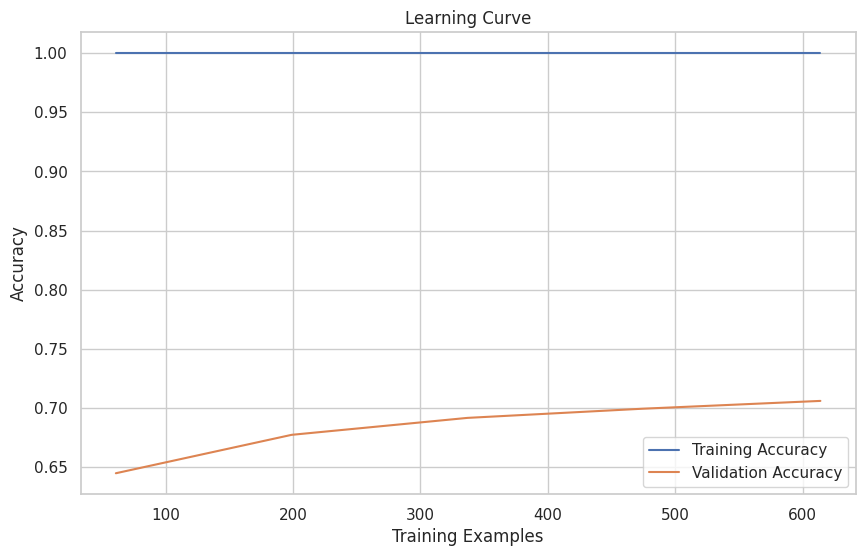

Matriz de Confusión:
[[197  57]
 [ 51  79]]
Precisión: 0.71875


In [102]:
from sklearn.model_selection import learning_curve
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# Obtener curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring='accuracy')

# Graficar curvas de aprendizaje
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Accuracy')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validation Accuracy')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.show()

# Obtener la matriz de confusión en el conjunto de prueba
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Mostrar la matriz de confusión
print("Matriz de Confusión:")
print(cm)

# Calcular y mostrar la precisión
accuracy = accuracy_score(y_test, y_pred)
print("Precisión:", accuracy)

Confusion Matrix

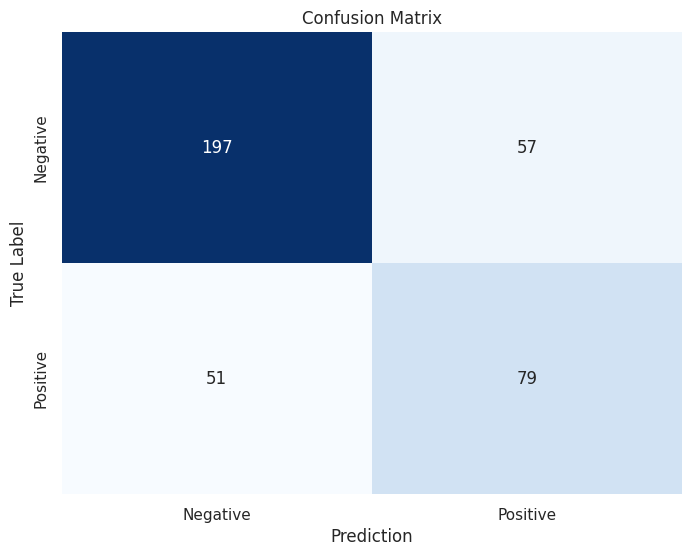

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap with seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])

# Add labels and title
plt.xlabel('Prediction')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Show the plot
plt.show()



✅True Positives (TP): 79

This indicates the number of instances that actually belong to the positive class and that the model has correctly classified as positive.

⛔False Positives (FP): 57

These are cases where the model has incorrectly classified instances that do not belong to the positive class as positive.

⛔False Negatives (FN): 51

These are cases where the model has incorrectly classified instances that belong to the positive class as negative.

✅True Negatives (TN): 197

This indicates the number of instances that do not actually belong to the positive class and that the model has correctly classified as negative

In summary:

The positive class appears to have a good number of true positives (81), indicating that the model is correctly identifying instances of that class.

There are some false positives (18), suggesting that the model is making errors by classifying instances that do not belong to the positive class as positive.

There are also some false negatives (17), indicating that the model is not correctly classifying all instances belonging to the positive class.

The negative class seems to have a good number of true negatives (38), indicating that the model is correctly identifying instances that do not belong to the positive class as negative.

🌼Tree Representation

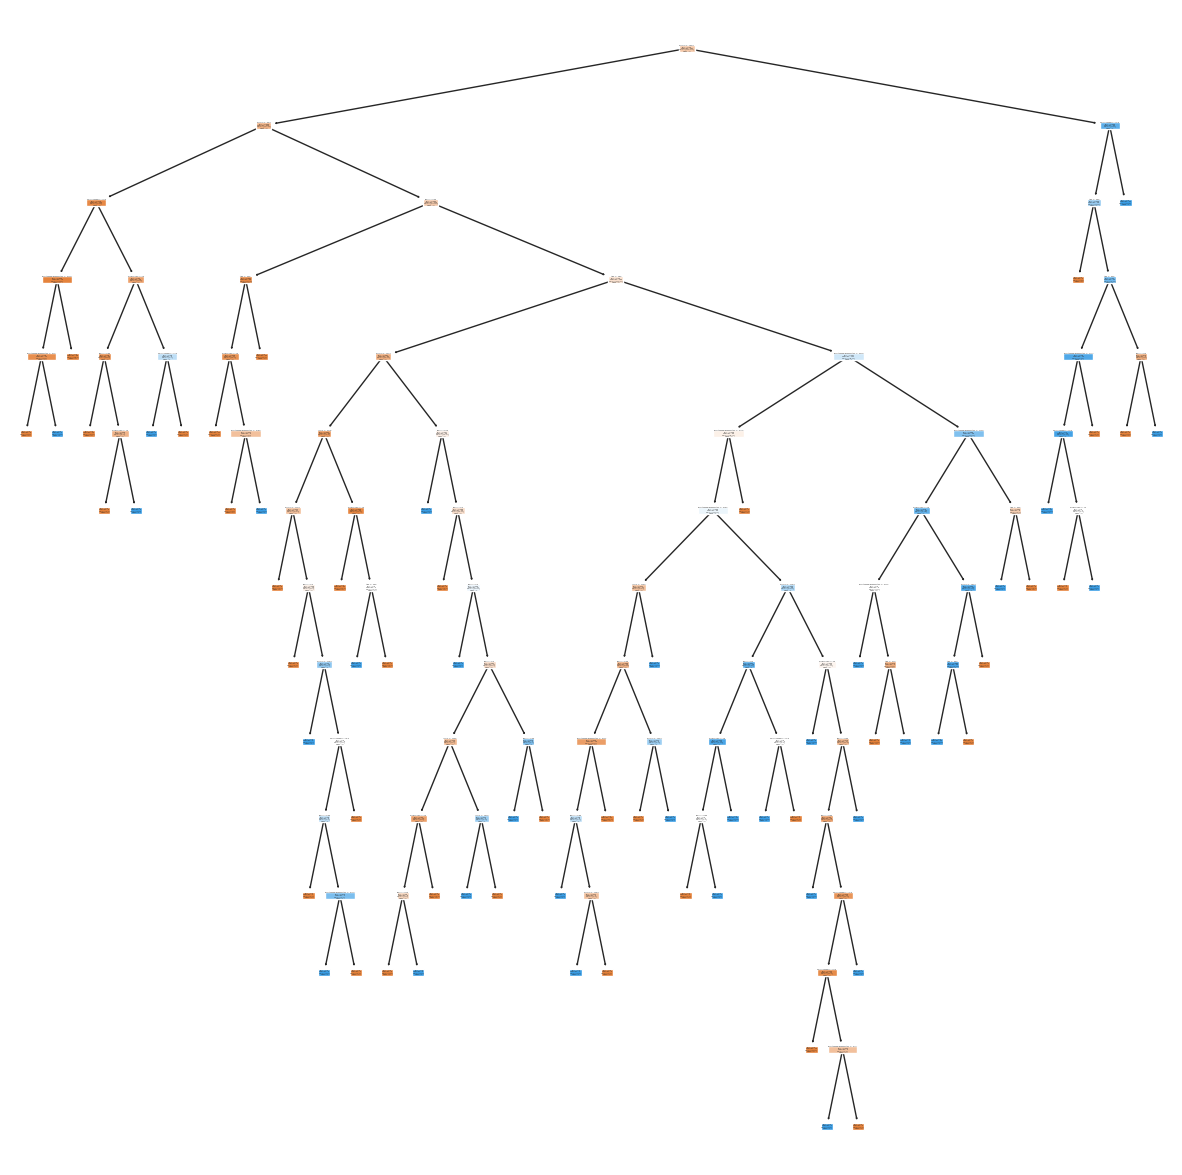

In [104]:
from sklearn import tree

fig = plt.figure(figsize=(15,15))

tree.plot_tree(model, feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

fig.savefig('arbol_decision_tree.png')

plt.show()

Prediction calculation using a trained model (model) on a test data set (X_test).

In [105]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,

In [106]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.71875


In [107]:
#save model file
import pickle
with open('modelo_decision_tree.pkl', 'wb') as file:
    pickle.dump(model, file)

👨‍💻Model optimization

In [45]:
'''from sklearn.model_selection import ParameterGrid
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

hyperparams = {
    "criterion": ["gini", "entropy", "log_loss"],
    "splitter": ["best", "random"],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": [None, "sqrt", "log2"],
    "max_leaf_nodes": [None, 10, 20, 30],
    "min_impurity_decrease": [0.0, 0.1, 0.2],
    "random_state": [42],
    "class_weight": [None, "balanced"],
    "ccp_alpha": [0.0, 0.1, 0.2]
}

accs = []
for combination in ParameterGrid(hyperparams):
    model = DecisionTreeClassifier(**combination)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    accs.append(accuracy_score(y_train, y_pred))

best_acc = max(accs)
best_combination = ParameterGrid(hyperparams)[accs.index(best_acc)]
best_model = DecisionTreeClassifier(**best_combination)
best_model.fit(X_train, y_train)'''



DecisionTreeClassifier(random_state=42)

In [49]:
'''def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train, y_train)

print(f"Best hyperparameters: {grid.best_params_}")'''

NameError: name 'grid' is not defined

In [119]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define el espacio de búsqueda de hiperparámetros
param_grid = {
    "criterion": ['log_loss', 'entropy', 'gini'],
    "splitter": ["best", "random"],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": [None, "sqrt", "log2"],
    "max_leaf_nodes": [None, 10, 20, 30],
    "min_impurity_decrease": [0.0, 0.1, 0.2],
    "random_state": [42],
    "class_weight": [None, "balanced"],
    "ccp_alpha": [0.0, 0.1, 0.2]
}

# Crear el modelo de árbol de decisiones
tree_model = DecisionTreeClassifier()

# Configurar la búsqueda de cuadrícula con validación cruzada
grid_search = GridSearchCV(tree_model, param_grid, cv=5, scoring='accuracy')

# Realizar la búsqueda de cuadrícula en los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_hyperparams = grid_search.best_params_

# Crear el modelo con los mejores hiperparámetros
best_model = DecisionTreeClassifier(**best_hyperparams)

# Entrenar el modelo con los datos de entrenamiento
best_model.fit(X_train, y_train)



DecisionTreeClassifier(criterion='log_loss', max_depth=5, max_leaf_nodes=20,
                       min_samples_leaf=2, min_samples_split=10,
                       random_state=42, splitter='random')

In [64]:
'''model = DecisionTreeClassifier(criterion = "entropy", max_depth = 5, min_samples_leaf = 4, min_samples_split = 2, random_state = 42)
model.fit(X_train, y_train)'''

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4,
                       random_state=42)

In [120]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,

In [121]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.71875

Save Model

In [124]:
from pickle import dump

dump(model, open("../models/tree_classifier_optimized.sav", "wb"))

Load Model

In [ ]:
'''from pickle import load
from sklearn.tree import DecisionTreeClassifier

# load the model from file
loaded_model = load(open("../models/tree_classifier_optimized.sav", "rb"))'''